In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

q_table_path = 'dino-log.csv'
df = pd.read_csv(q_table_path, header=None, names=['time','episode', 'steps_count', 'total_rewards', 'scores', 'epsilon'])
df = df.set_index('episode')

In [2]:
# maximum scores gained in the training process 
df.loc[df['scores'] == max(df['scores'])]

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
1489,"2021-01-03 22:32:44,267",5361636,952.1,3028,0.0001


In [3]:
[i for i in range(2001) if i%10==0]

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1160,
 1170,
 1180,
 1190,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1260,
 1270,
 1280,
 1290,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1360,
 1370,
 1380,
 1390,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1460,
 1470,
 1480,
 1490,
 1500,
 1510,
 1520,
 1530,
 1540,
 1550,
 1560,
 1570,
 1580

In [4]:
df.head(10)

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
0,"2021-01-02 18:41:14,778",220,16.7,47,0.099779
1,"2021-01-02 18:41:20,985",494,20.7,57,0.099506
2,"2021-01-02 18:41:27,362",781,21.7,59,0.099220
3,"2021-01-02 18:41:32,866",1026,18.0,51,0.098976
4,"2021-01-02 18:41:38,368",1270,17.4,50,0.098734
5,"2021-01-02 18:41:43,091",1481,15.4,42,0.098525
6,"2021-01-02 18:41:47,674",1678,13.9,42,0.098331
7,"2021-01-02 18:41:52,209",1866,12.8,41,0.098145
8,"2021-01-02 18:41:57,382",2083,15.2,47,0.097932


In [5]:
df.tail(10)

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
1991,"2021-01-04 13:24:10,620",8247088,516.8,1489,0.0001
1992,"2021-01-04 13:24:48,391",8248763,162.8,404,0.0001
1993,"2021-01-04 13:26:29,542",8253722,484.7,1370,0.0001
1994,"2021-01-04 13:28:08,164",8258087,425.9,1325,0.0001
1995,"2021-01-04 13:29:51,786",8263552,535.2,1415,0.0001
1996,"2021-01-04 13:31:36,145",8268022,437.1,1429,0.0001
1997,"2021-01-04 13:32:02,568",8269419,136.1,268,0.0001
1998,"2021-01-04 13:33:03,646",8272657,316.7,717,0.0001
1999,"2021-01-04 13:35:05,884",8279346,655.7,1509,0.0001


### Result Visualization

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


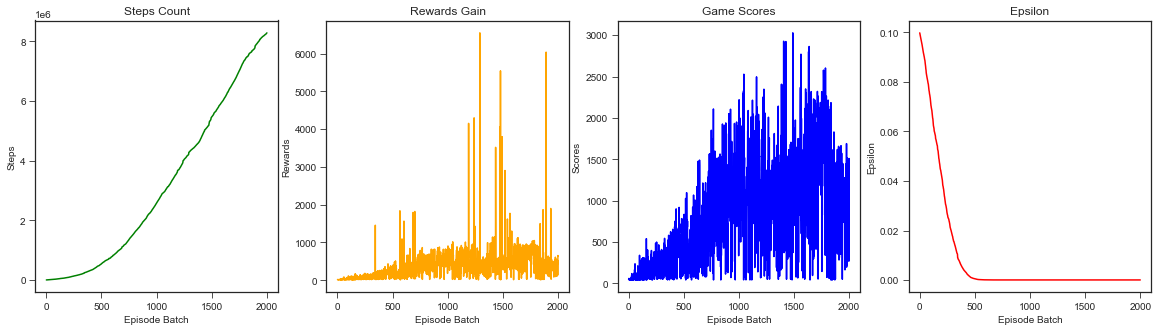

In [6]:
plt.style.use(['seaborn-ticks'])
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
x = df.index
y1 = df.steps_count
y2 = df.total_rewards
y3 = df.scores
y4 = df.epsilon

ax[0].plot(x, y1, linestyle='-', color='green')
ax[0].set_title('Steps Count')
ax[0].set_xlabel('Episode Batch')
ax[0].set_ylabel('Steps')
ax[0].legend()

ax[1].plot(x, y2, linestyle='-', color='orange')
ax[1].set_title('Rewards Gain')
ax[1].set_xlabel('Episode Batch')
ax[1].set_ylabel('Rewards')
ax[1].legend()

ax[2].plot(x, y3, linestyle='-', color='blue')
ax[2].set_title('Game Scores')
ax[2].set_xlabel('Episode Batch')
ax[2].set_ylabel('Scores')
ax[2].legend()

ax[3].plot(x, y4, linestyle='-', color='red')
ax[3].set_title('Epsilon')
ax[3].set_xlabel('Episode Batch')
ax[3].set_ylabel('Epsilon')
ax[3].legend()

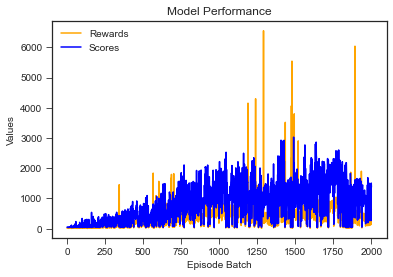

In [7]:
plt.plot(x, y2, label="Rewards", linestyle='-', color='orange')
plt.plot(x, y3, label="Scores", linestyle='-', color='blue')
plt.title('Model Performance')
plt.xlabel('Episode Batch')
plt.ylabel('Values')
plt.legend()

### Result Visualization [Computed Batch Average]

In [8]:
avg_df = df.groupby(np.arange(len(df))//100).mean()

In [9]:
avg_df

,steps_count,total_rewards,scores,epsilon
0,14674.83,25.900,69.74,0.086717
1,58901.19,42.808,116.49,0.056085
2,130783.15,74.355,189.68,0.027931
3,243940.13,130.645,268.93,0.009599
4,420784.63,212.408,449.98,0.001914
5,670939.92,244.358,471.41,0.000253
6,964199.93,335.701,649.99,0.000110
7,1356413.21,435.177,913.98,0.000100
8,1813754.10,438.880,920.11,0.000100
9,2305626.04,523.506,1136.14,0.000100


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


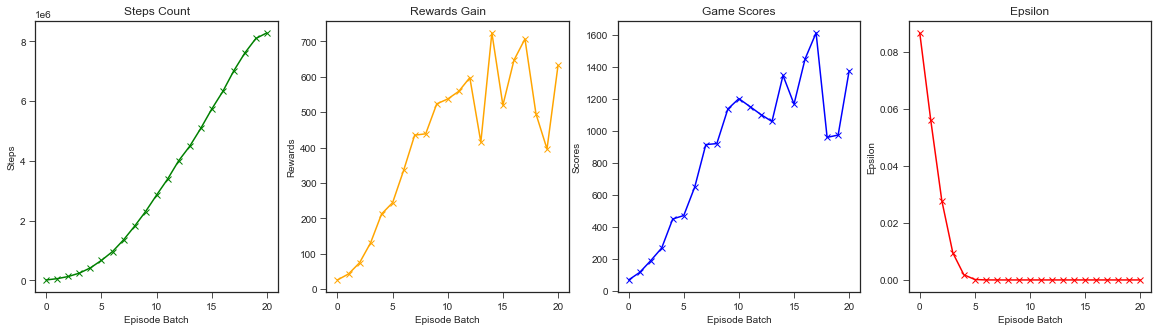

In [10]:
plt.style.use(['seaborn-ticks'])
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
x = avg_df.index
y1 = avg_df.steps_count
y2 = avg_df.total_rewards
y3 = avg_df.scores
y4 = avg_df.epsilon

ax[0].plot(x, y1, linestyle='-', marker='x', color='green')
ax[0].set_title('Steps Count')
ax[0].set_xlabel('Episode Batch')
ax[0].set_ylabel('Steps')
ax[0].legend()

ax[1].plot(x, y2, linestyle='-', marker='x', color='orange')
ax[1].set_title('Rewards Gain')
ax[1].set_xlabel('Episode Batch')
ax[1].set_ylabel('Rewards')
ax[1].legend()

ax[2].plot(x, y3, linestyle='-', marker='x', color='blue')
ax[2].set_title('Game Scores')
ax[2].set_xlabel('Episode Batch')
ax[2].set_ylabel('Scores')
ax[2].legend()

ax[3].plot(x, y4, linestyle='-', marker='x', color='red')
ax[3].set_title('Epsilon')
ax[3].set_xlabel('Episode Batch')
ax[3].set_ylabel('Epsilon')
ax[3].legend()

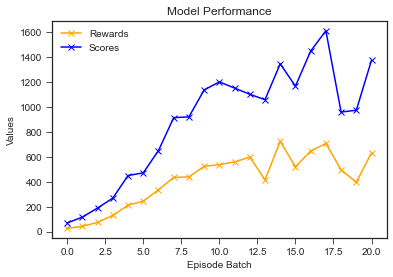

In [11]:
plt.plot(x, y2, label="Rewards", linestyle='-', marker='x', color='orange')
plt.plot(x, y3, label="Scores", linestyle='-', marker='x', color='blue')
plt.title('Model Performance')
plt.xlabel('Episode Batch')
plt.ylabel('Values')
plt.legend()